## EDA - Dataset 3

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../data/raw/dataset_3_features.csv')

#### Data Understanding

In [22]:
df.head()

,url_length,path_length,subdomain_length,n_dots,n_hyphens,n_underscore,n_slash,n_questionmark,n_equal,n_at,n_and,n_redirection,subdomain_level,path_level,has_https,has_ip_address,Label
0,225,134,0,6,4,4,10,1,4,0,3,-1,0,8,0,0,bad
1,81,81,0,5,2,1,4,0,2,0,1,-1,0,4,0,0,bad
2,177,177,0,7,1,0,11,0,0,0,0,-1,0,11,0,0,bad
3,60,60,0,6,0,0,2,0,0,0,0,-1,0,2,0,0,bad
4,116,79,0,1,1,0,10,1,0,0,0,0,0,7,0,0,bad


In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   url_length        549346 non-null  int64 
 1   path_length       549346 non-null  int64 
 2   subdomain_length  549346 non-null  int64 
 3   n_dots            549346 non-null  int64 
 4   n_hyphens         549346 non-null  int64 
 5   n_underscore      549346 non-null  int64 
 6   n_slash           549346 non-null  int64 
 7   n_questionmark    549346 non-null  int64 
 8   n_equal           549346 non-null  int64 
 9   n_at              549346 non-null  int64 
 10  n_and             549346 non-null  int64 
 11  n_redirection     549346 non-null  int64 
 12  subdomain_level   549346 non-null  int64 
 13  path_level        549346 non-null  int64 
 14  has_https         549346 non-null  int64 
 15  has_ip_address    549346 non-null  int64 
 16  Label             549346 non-null  obj

,url_length,path_length,subdomain_length,n_dots,n_hyphens,n_underscore,n_slash,n_questionmark,n_equal,n_at,n_and,n_redirection,subdomain_level,path_level,has_https,has_ip_address
count,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000,549346.000000
mean,50.736288,43.426107,0.001753,2.062316,1.126461,0.390845,2.445168,0.161390,0.278629,0.003877,0.133437,-0.996070,0.000521,2.386758,0.000013,0.000013
std,44.418080,26.879089,0.146656,1.514629,2.424343,1.317131,1.595707,0.512545,0.956683,0.068101,0.808088,0.071119,0.040607,1.513634,0.003570,0.003570
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,26.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
50%,40.000000,37.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,2.000000,0.000000,0.000000
75%,59.000000,53.000000,0.000000,2.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,3.000000,0.000000,0.000000
max,2307.000000,2175.000000,30.000000,37.000000,42.000000,200.000000,35.000000,166.000000,34.000000,10.000000,37.000000,5.000000,6.000000,34.000000,1.000000,1.000000


In [24]:
df.isna().sum()

url_length          0
path_length         0
subdomain_length    0
n_dots              0
n_hyphens           0
n_underscore        0
n_slash             0
n_questionmark      0
n_equal             0
n_at                0
n_and               0
n_redirection       0
subdomain_level     0
path_level          0
has_https           0
has_ip_address      0
Label               0
dtype: int64

#### Data Manipulation

In [25]:
# Change target feature from object to int

df["Label"] = df["Label"].map({"good": 0, "bad": 1}).astype("int64")

#### Data Visualization

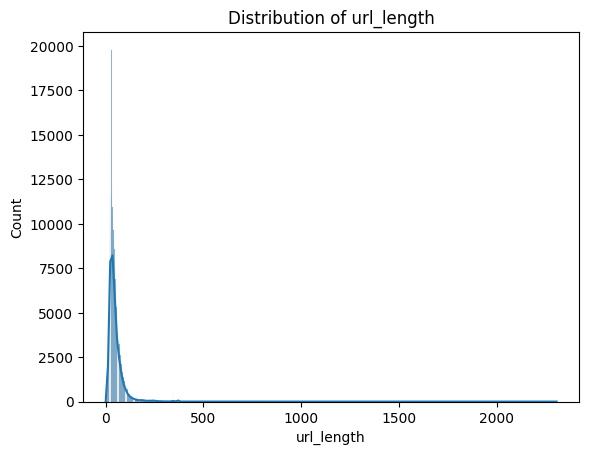

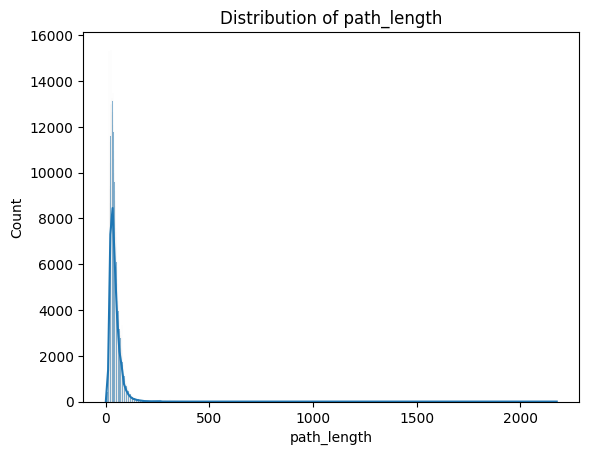

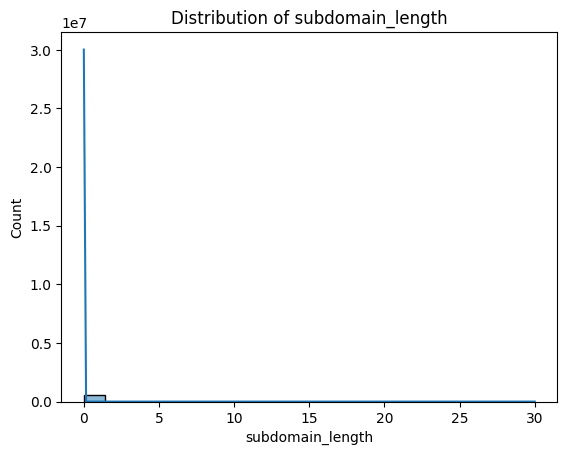

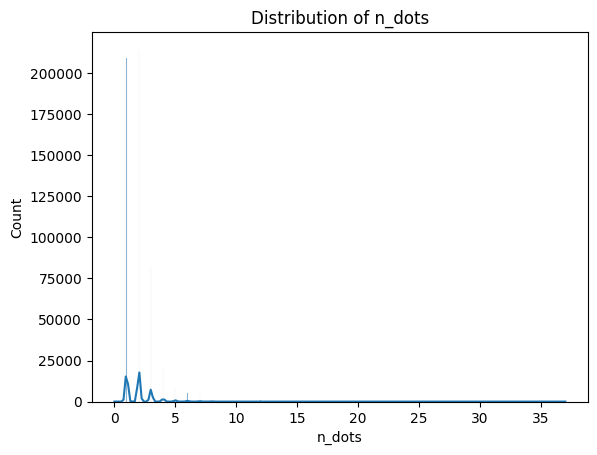

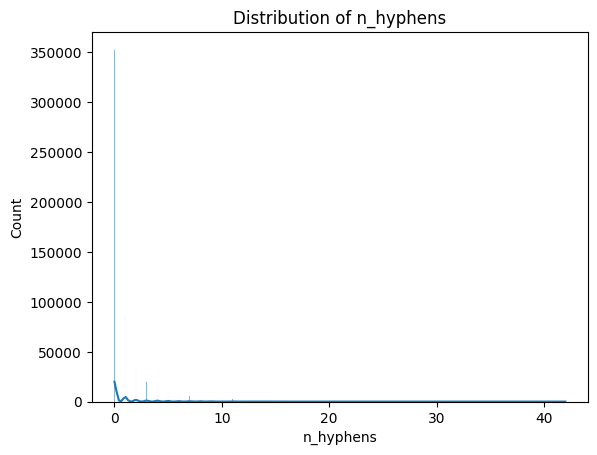

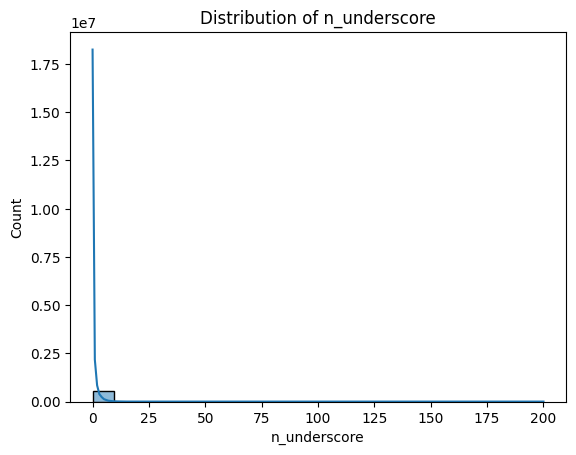

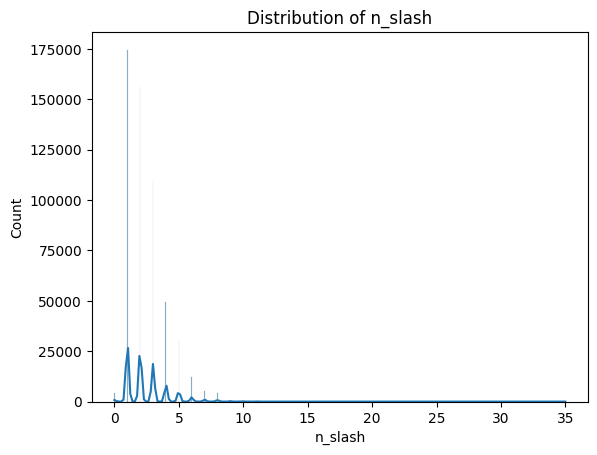

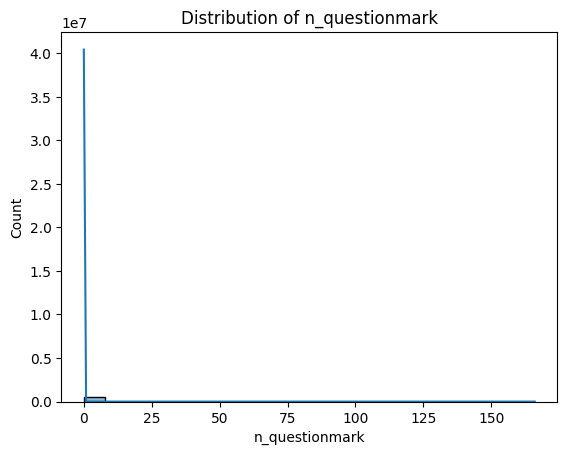

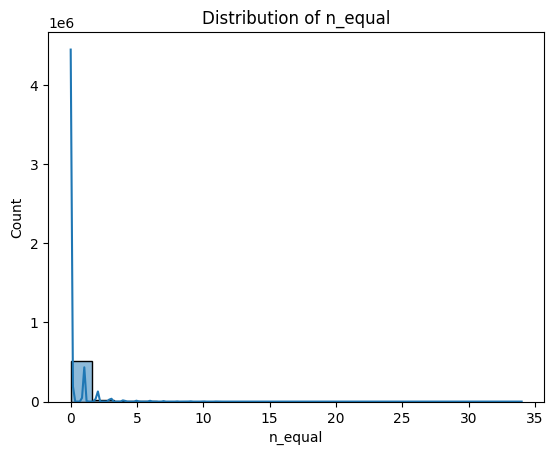

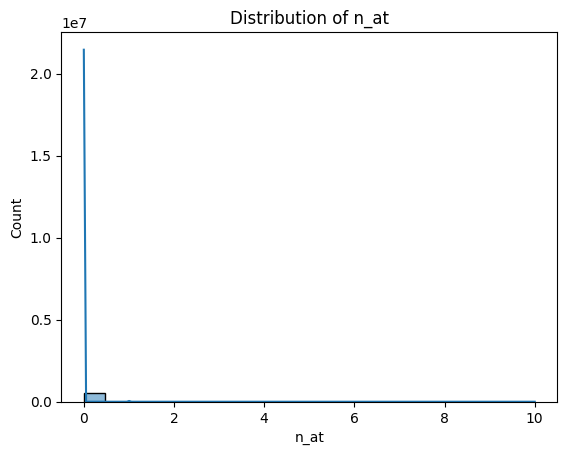

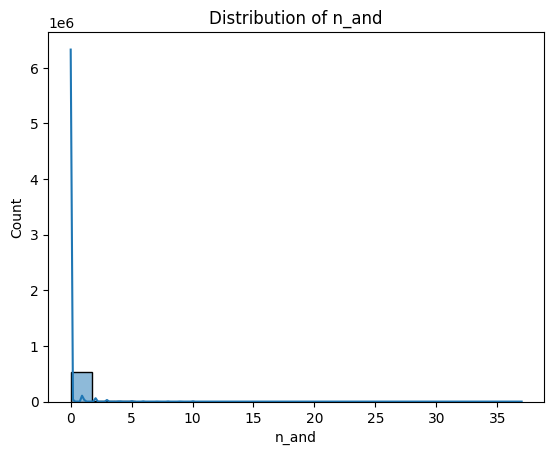

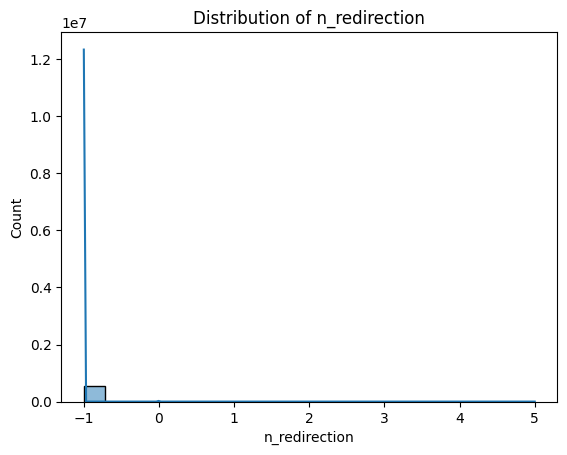

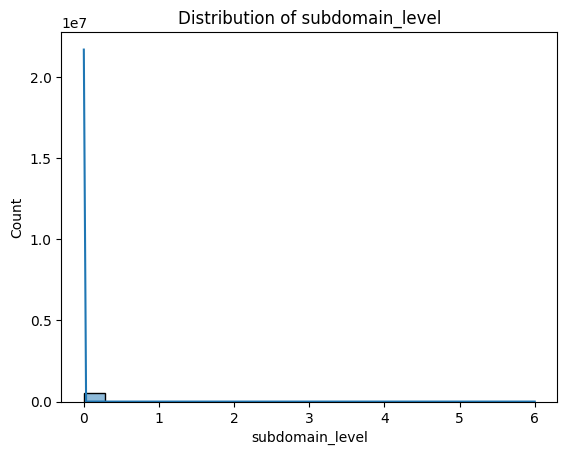

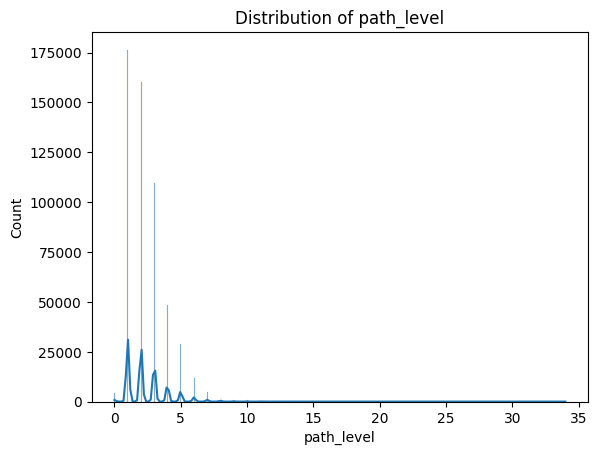

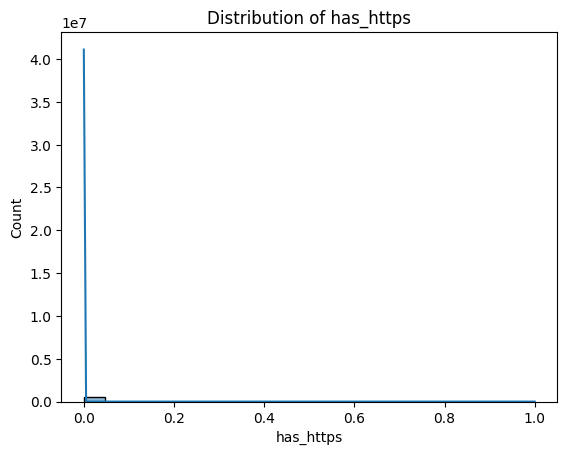

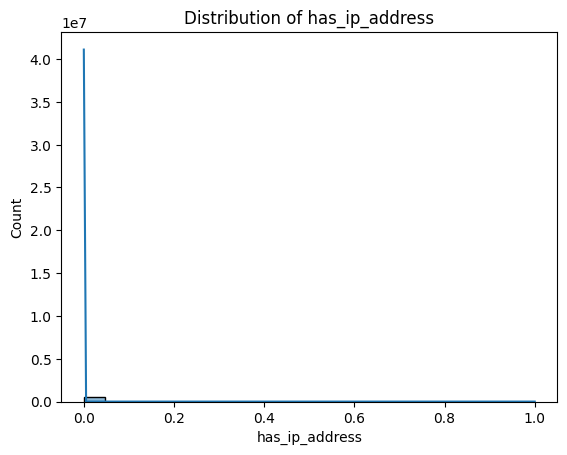

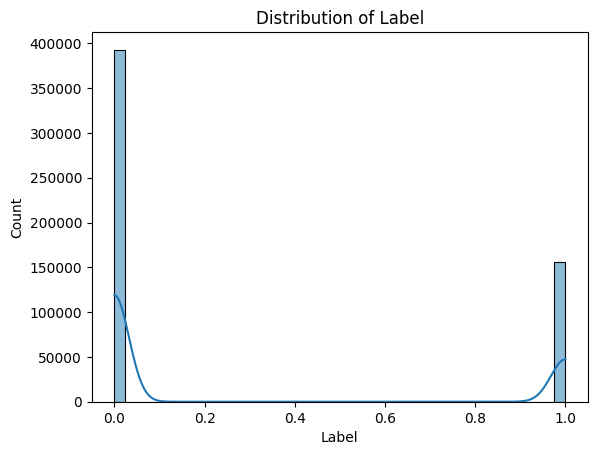

In [26]:
# Goes through all features and outputs graph

for col in df.select_dtypes(include=["int"]).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

C:\Users\Bobathy\AppData\Local\Temp\ipykernel_10596\3317827696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Label"], palette='pastel', legend=False)


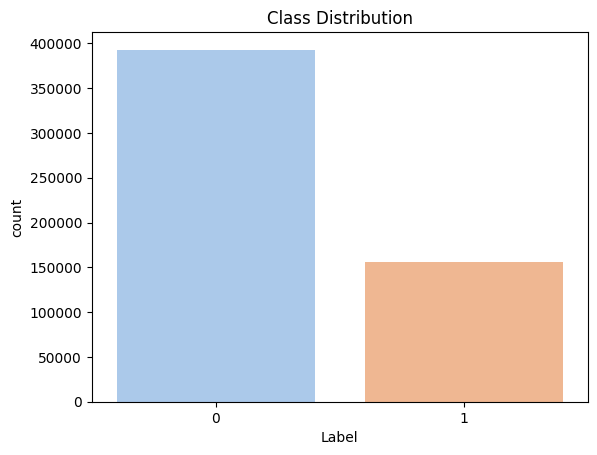

In [27]:
# Checking distribution of output variable

sns.countplot(x=df["Label"], palette='pastel', legend=False)
plt.title("Class Distribution")
plt.show()

#### Outlier Detection + Normalization

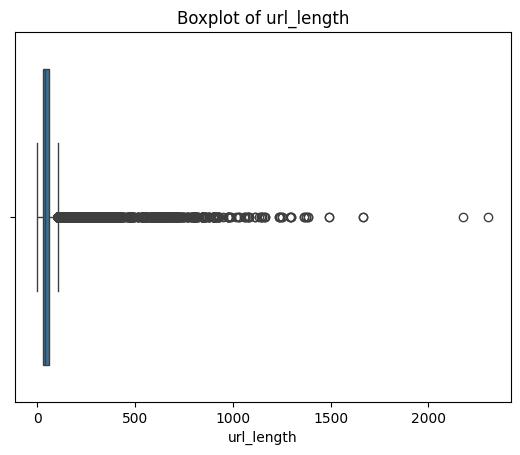

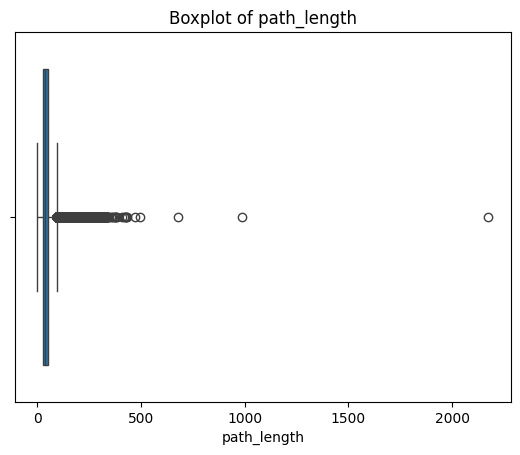

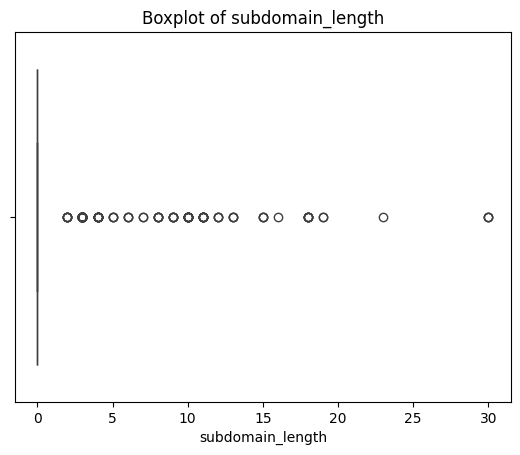

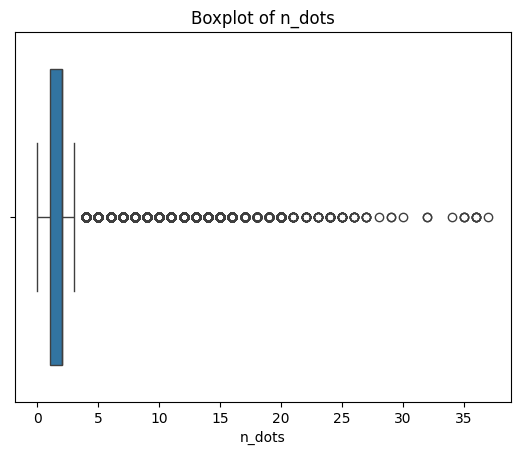

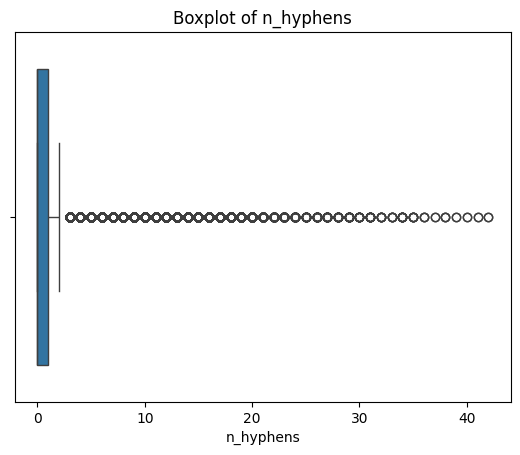

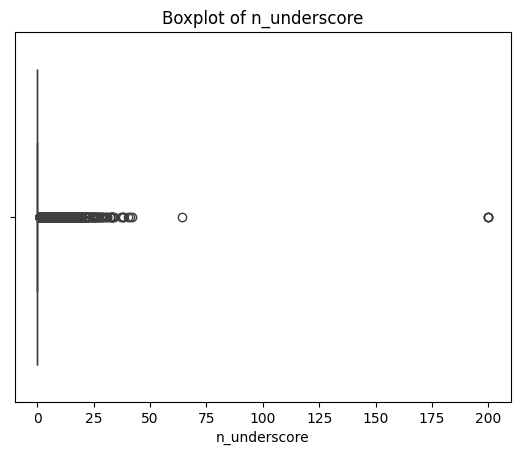

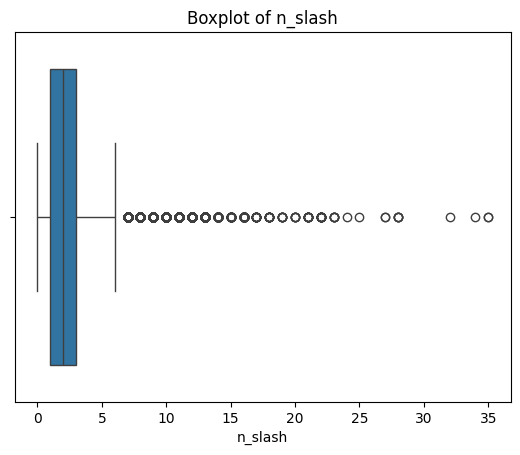

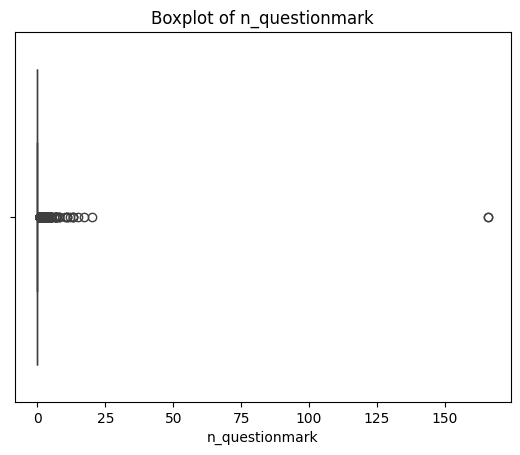

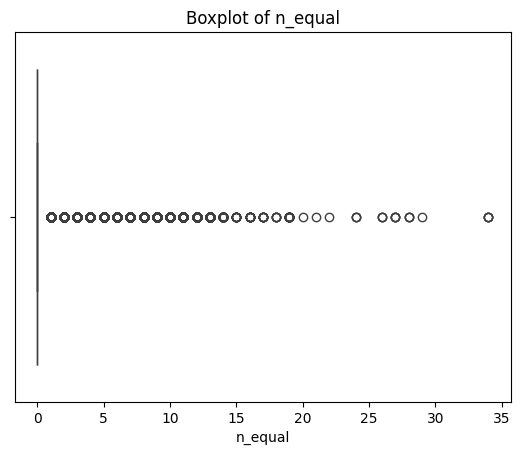

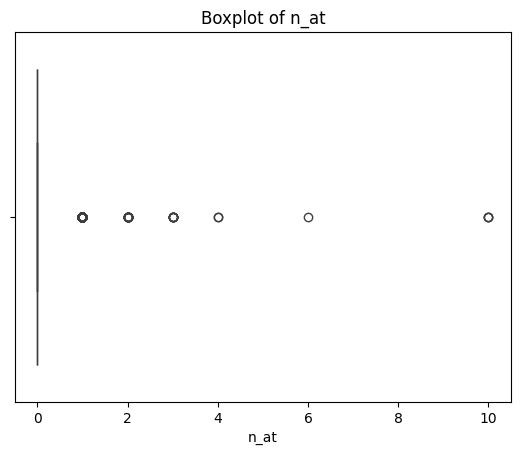

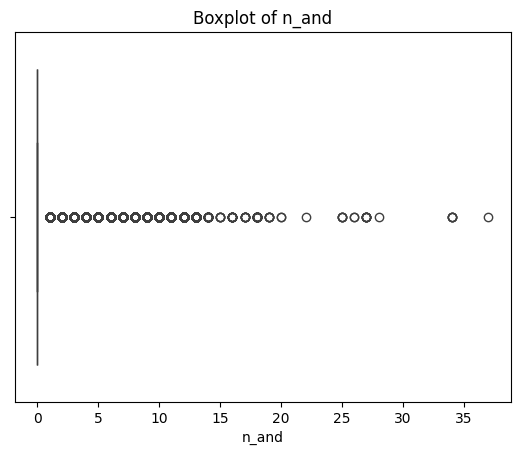

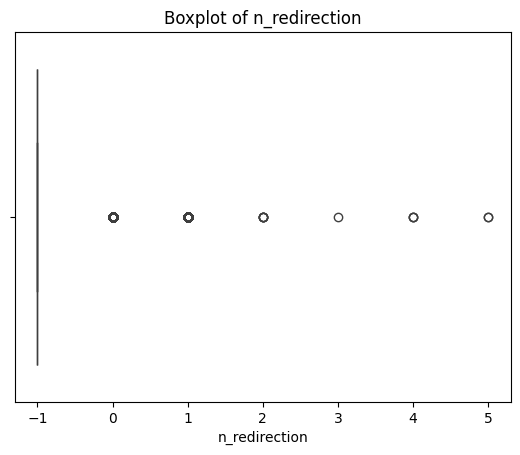

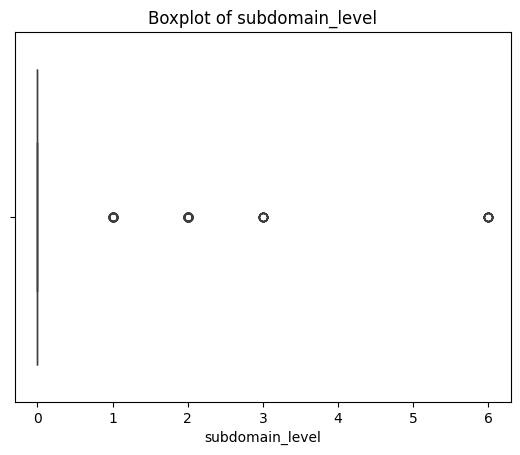

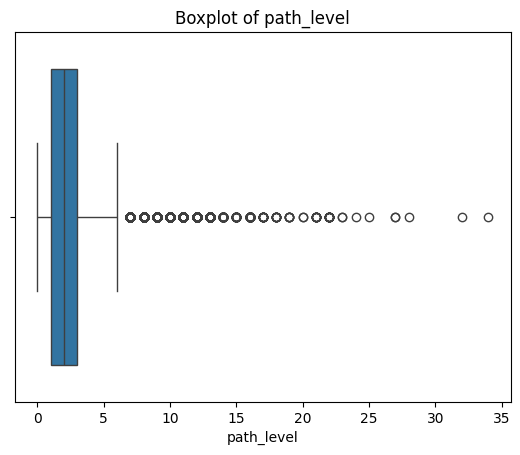

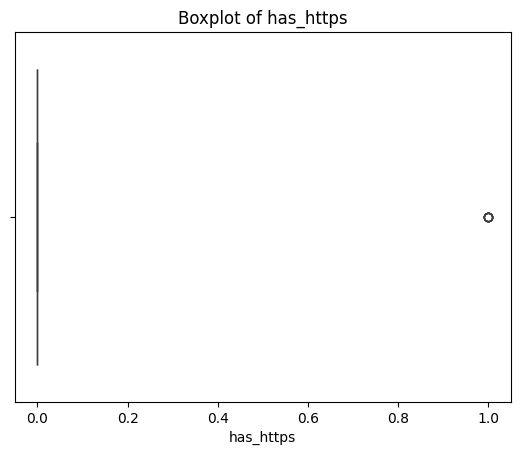

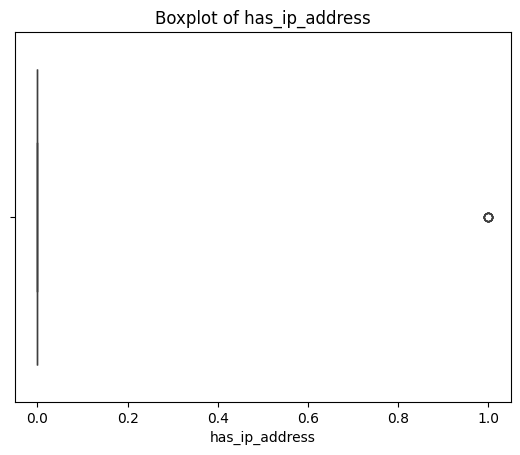

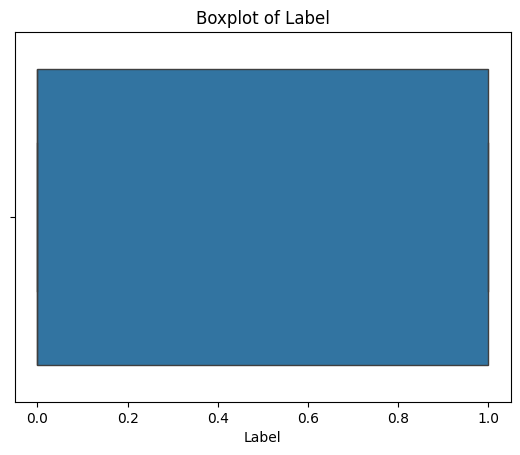

In [28]:
# Outputs boxplots to show outliers

for col in df.select_dtypes(include=["int", "float"]).columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [29]:
# Robust scaling all features

from sklearn.preprocessing import RobustScaler

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Label")

scaler = RobustScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#### Feature Importance

In [30]:
# Computes MI score and outputs the score

from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=["Label"])
y = df["Label"]

mi_scores = mutual_info_classif(X, y, discrete_features="auto")

mi_scores_df = pd.DataFrame({"Feature": X.columns, "Mutual Information": mi_scores})
mi_scores_df.sort_values(by="Mutual Information", ascending=False)

,Feature,Mutual Information
3,n_dots,0.060792
0,url_length,0.037896
6,n_slash,0.035949
13,path_level,0.026995
4,n_hyphens,0.018645
1,path_length,0.016940
7,n_questionmark,0.016173
8,n_equal,0.012996
10,n_and,0.012194
11,n_redirection,0.005101


In [31]:
# Keep features with MI score >= 0.01

selected_features = mi_scores_df[mi_scores_df["Mutual Information"] >= 0.01]["Feature"].tolist()
df = df[selected_features + ["Label"]]

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   url_length      549346 non-null  float64
 1   path_length     549346 non-null  float64
 2   n_dots          549346 non-null  float64
 3   n_hyphens       549346 non-null  float64
 4   n_slash         549346 non-null  float64
 5   n_questionmark  549346 non-null  float64
 6   n_equal         549346 non-null  float64
 7   n_and           549346 non-null  float64
 8   path_level      549346 non-null  float64
 9   Label           549346 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 41.9 MB


,url_length,path_length,n_dots,n_hyphens,n_slash,n_questionmark,n_equal,n_and,path_level,Label
0,6.166667,3.592593,4.0,4.0,4.0,1.0,4.0,3.0,3.0,1
1,1.366667,1.629630,3.0,2.0,1.0,0.0,2.0,1.0,1.0,1
2,4.566667,5.185185,5.0,1.0,4.5,0.0,0.0,0.0,4.5,1
3,0.666667,0.851852,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2.533333,1.555556,-1.0,1.0,4.0,1.0,0.0,0.0,2.5,1


#### Exporting Data

In [ ]:
df.to_csv('../data/processed/dataset_3_processed.csv', index=False)